In [ ]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
df = pickle.load(open('./results/walking/50.p','rb'))

In [ ]:
df[df.train_user==50]

In [ ]:
results = pickle.load(open('./data/walking_results.p','rb'))

In [ ]:
data_col = []
for window_size,test_score,test_df,y_test,unique_users_dict in results:
    if len(np.unique(y_test))<20:
        continue
    test_score['train_lengths'] = window_size
    data_col.append(test_score)

In [ ]:
scores = pd.concat(data_col)

In [ ]:
scores = scores[scores.test_lengths.isin(np.arange(1,177,8))]

In [ ]:
scores_mean = scores.groupby(['train_lengths','test_lengths'],as_index=False).mean()

In [ ]:
maxmean_score = pd.pivot_table(scores_mean,values='maxmean_score',index='test_lengths',columns='train_lengths',aggfunc='mean')

import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(20,10))
sns.heatmap(maxmean_score,annot=True,fmt='.2f',cmap='Reds',linewidth=1,linecolor='black')
plt.title('Max Mean Boosting')
plt.xlabel('Train data per user, minutes')
plt.ylabel('Test data length, minutes')
plt.savefig('./images/maxmean_boosting.png',dps=1e6)
plt.show()

In [ ]:
maxmean_score = pd.pivot_table(scores_mean,values='majority_score',index='test_lengths',columns='train_lengths',aggfunc='mean')

import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(20,10))
sns.heatmap(maxmean_score,annot=True,fmt='.2f',cmap='Reds',linewidth=1,linecolor='black')
plt.title('Majority Boosting')
plt.xlabel('Train data per user, minutes')
plt.ylabel('Test data length, minutes')
plt.savefig('./images/majority_boosting.png',dps=1e6)
plt.show()


In [1]:
import pickle
import os
import pandas as pd

In [2]:
directory ='./results/myresults/'

In [3]:
results= []
for f in os.listdir(directory):
    df = pickle.load(open(directory+f,'rb'))
    results.append(df)

In [4]:
data = pd.concat(results).reset_index(drop=True)

In [5]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt
data['Moving Average Window size'] = data['smoothing_factor']

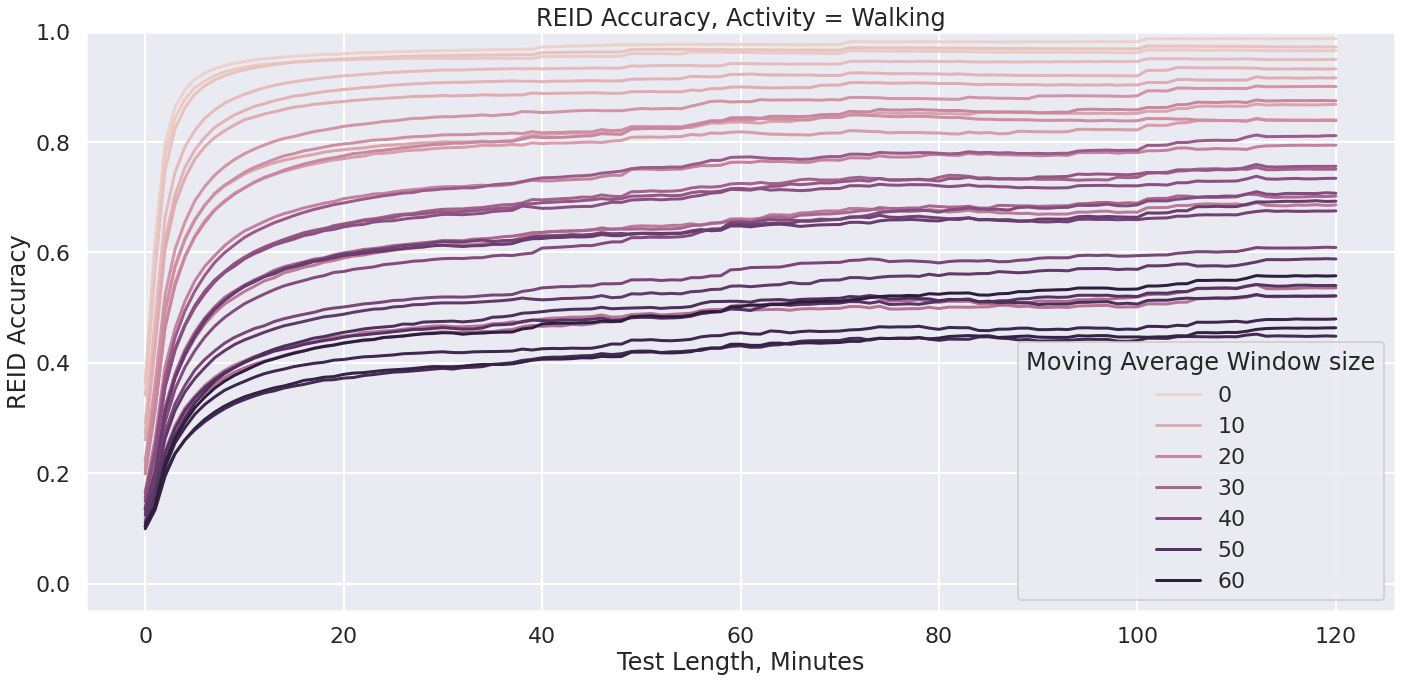

In [19]:
%matplotlib inline
plt.figure(figsize=(20,10))
sns.set_theme('poster')
sns.lineplot(x='test_lengths',y='majority_score',hue='Moving Average Window size',data=data)
plt.xlabel('Test Length, Minutes')
plt.ylabel('REID Accuracy')
plt.ylim([-.05,1])
plt.title('REID Accuracy, Activity = Walking')
plt.tight_layout()
plt.savefig('./images/walking/smoothing.png')
# plt.legend(ncol=6)
plt.show()

In [20]:
data.groupby('smoothing_factor').min()

,test_lengths,majority_score,train_user,train_lengths,Moving Average Window size
smoothing_factor,,,,,
0,0,0.369641,347,120,0
2,0,0.362418,347,120,2
4,0,0.340811,347,120,4
6,0,0.290862,347,120,6
8,0,0.273320,347,120,8
10,0,0.260320,347,120,10
12,0,0.217902,347,120,12
14,0,0.199347,347,120,14
16,0,0.222719,347,120,16


In [16]:
1/347

0.002881844380403458